In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
# 경고 메시지 숨기기
warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv("./data/data_total_split_datetime")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856566 entries, 0 to 856565
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0.1                  856566 non-null  int64  
 1   Unnamed: 0                    856566 non-null  int64  
 2   msno                          856566 non-null  int64  
 3   city                          856566 non-null  int64  
 4   bd                            856566 non-null  int64  
 5   registered_via                856566 non-null  int64  
 6   is_churn                      856566 non-null  int64  
 7   is_back                       856566 non-null  int64  
 8   payment_plan_sum              856566 non-null  int64  
 9   plan_list_price               856566 non-null  int64  
 10  actual_amount_paid            856566 non-null  int64  
 11  discount_rate                 856566 non-null  float64
 12  is_auto_renew                 856566 non-nul

In [38]:
# X와 y 정의 (예시)
X = df.drop(columns='is_churn')  # 'target'은 예시로 넣은 이름입니다
y = df['is_churn']

# 컬럼 이름을 문자열로 변환
X.columns = X.columns.astype(str)

# 모델 학습
model = RandomForestClassifier()
model.fit(X, y)

# 특성 중요도 추출
importances = model.feature_importances_

# 결과 출력
print(importances)

[0.01595461 0.01597863 0.01704125 0.00990272 0.01380285 0.01214264
 0.00305084 0.02781094 0.02454138 0.02707038 0.0050496  0.07446746
 0.03984023 0.03974592 0.01839925 0.01649798 0.01753766 0.0176665
 0.01789171 0.01850536 0.01738112 0.0085341  0.01016049 0.01427331
 0.00791347 0.36805519 0.0356422  0.00324275 0.03636889 0.04363597
 0.00259066 0.00787608 0.01142785 0.        ]


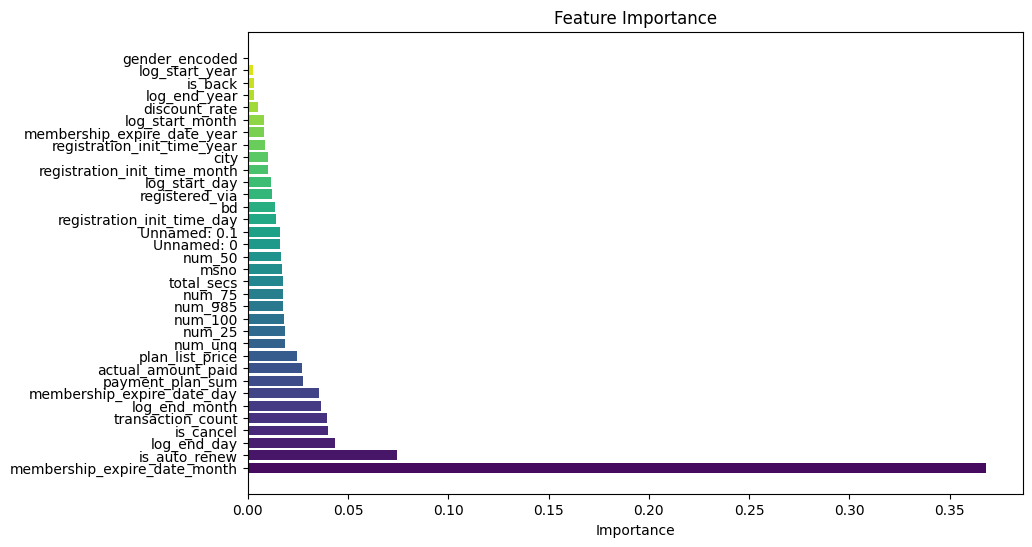

In [40]:

# 특성 중요도에 대한 막대 그래프 시각화
def plot_feature_importances(importances, feature_names):
    # 중요도 순으로 정렬
    indices = np.argsort(importances)[::-1]
    
    # 팔레트 색상 적용 (예시로 'viridis' 팔레트 사용)
    colors = sns.color_palette("viridis", len(importances))

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.barh(range(len(importances)), importances[indices], align="center", color=colors)
    plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
    plt.xlabel("Importance")
    plt.show()

# 특성 중요도 시각화 함수 실행
plot_feature_importances(importances, X.columns)